In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno
from scipy import stats

In [2]:
# load dataset
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
sample_data = pd.read_csv('datasets/Sample_Submission.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train_data.describe(include=["O"])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [7]:
data_all = train_data.append(test_data)
data_all.reset_index(inplace = True)


In [8]:
data_all.head()

,index,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [9]:
data_all.drop('index', inplace = True, axis = 1)

In [10]:
data_all.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [11]:
data_all.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


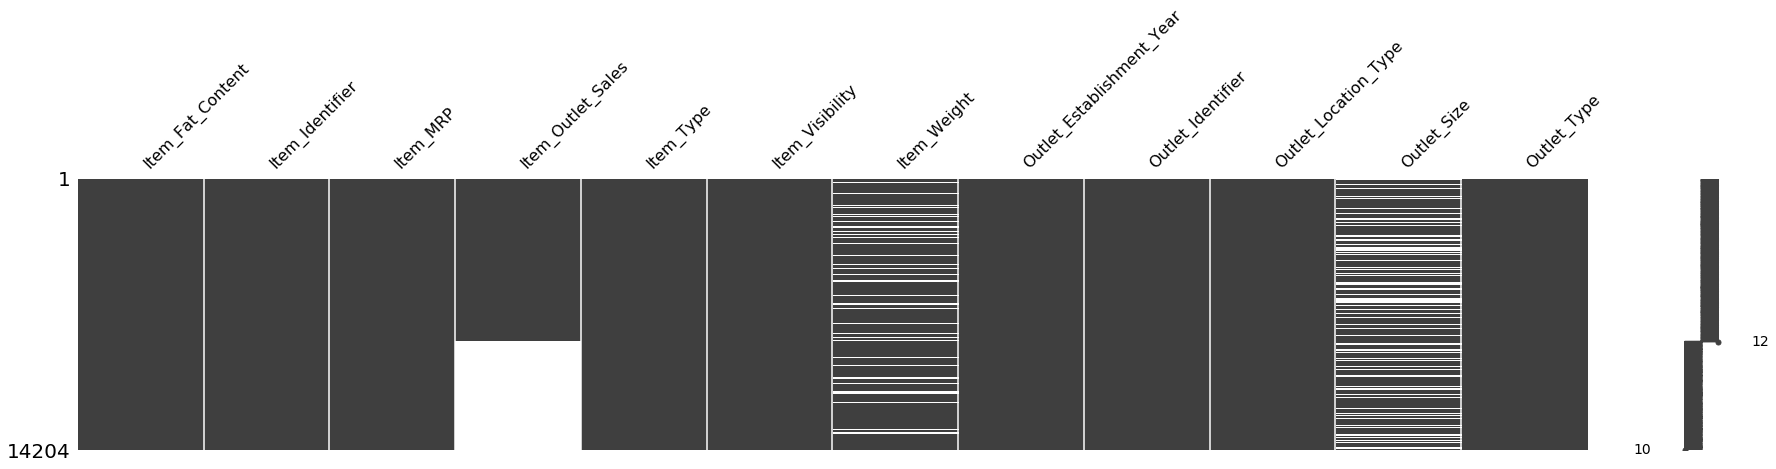

In [12]:
missingno.matrix(data_all, figsize = (30,5))

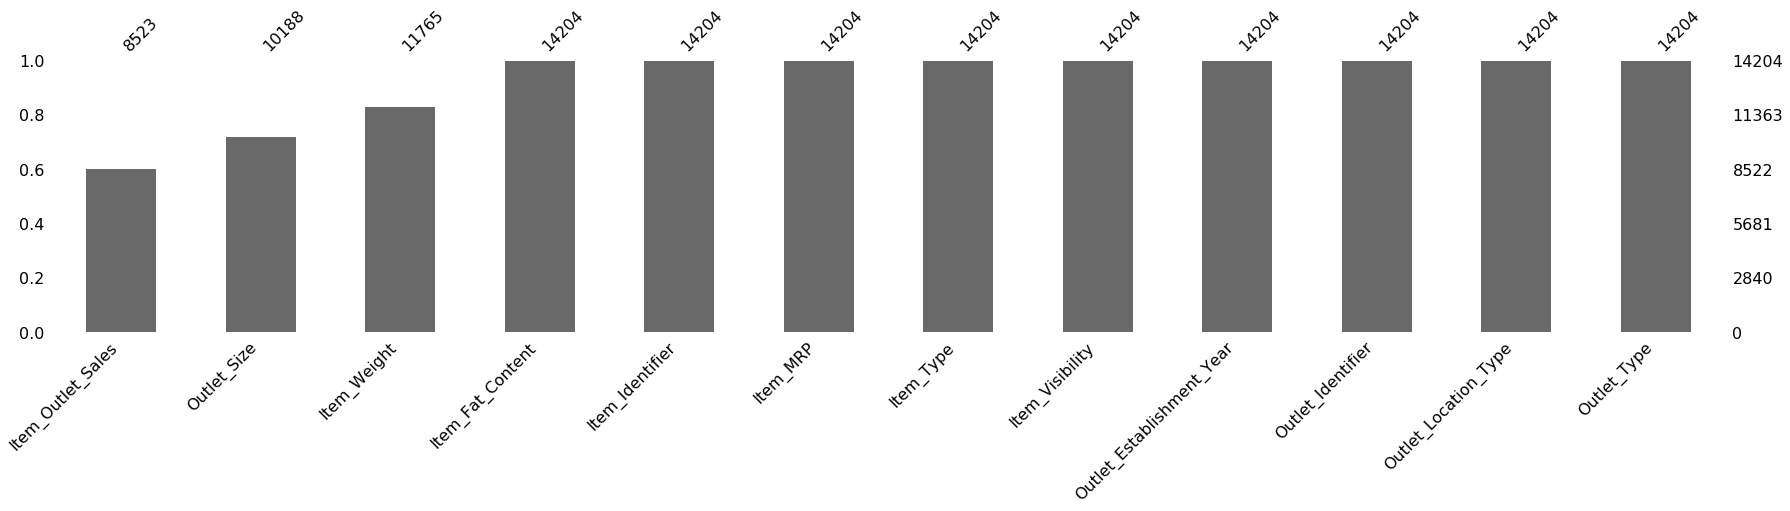

In [13]:
missingno.bar(data_all, sort= 'ascending', figsize=(30,5))

In [14]:
train_data['Item_Identifier'].isnan().value_counts()

AttributeError: 'Series' object has no attribute 'isnan'

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [17]:
data_all.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
1230.3984    14
1416.8224    13
1438.1280    12
759.0120     12
575.2512     12
1211.7560    12
539.2980     12
852.2240     11
1537.9980    11
1701.7848    11
639.1680     11
679.1160     11
2109.2544    11
2277.0360    11
1406.1696    11
1304.9680    11
2696.4900    10
1470.0864    10
1006.6896    10
2117.2440    10
2956.1520    10
1821.6288    10
2348.9424    10
918.8040     10
1677.8160    10
             ..
6911.0040     1
3837.0054     1
4821.7236     1
2526.0452     1
3211.8192     1
670.4606      1
2706.4770     1
316.2550      1
4483.4972     1
2119.9072     1
2925.5252     1
3542.7218     1
6275.1650     1
1803.6522     1
2764.4016     1
3073.9986     1
1311.6260     1
6524.8400     1
1998.7316     1
1599.9174     1
5329.0632     1
4610.6650     1
3938.8728     1
233.0300      1
7478.2656     1
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales,

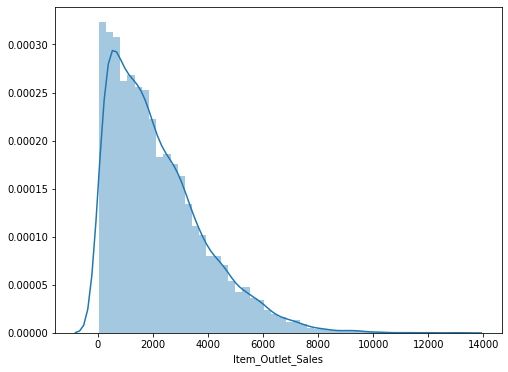

In [8]:
f, ax =  plt.subplots(figsize = (8,6))
sns.distplot(train_data['Item_Outlet_Sales']);


In [9]:
train_data['Item_Outlet_Sales'].skew()

1.1775306028542798

In [10]:
train_data['Item_Outlet_Sales'].kurt()

1.6158766814287264

In [11]:
train_data['Item_Outlet_Sales'].describe()                                                                                                                                                                                                                                                                                                                                                                

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

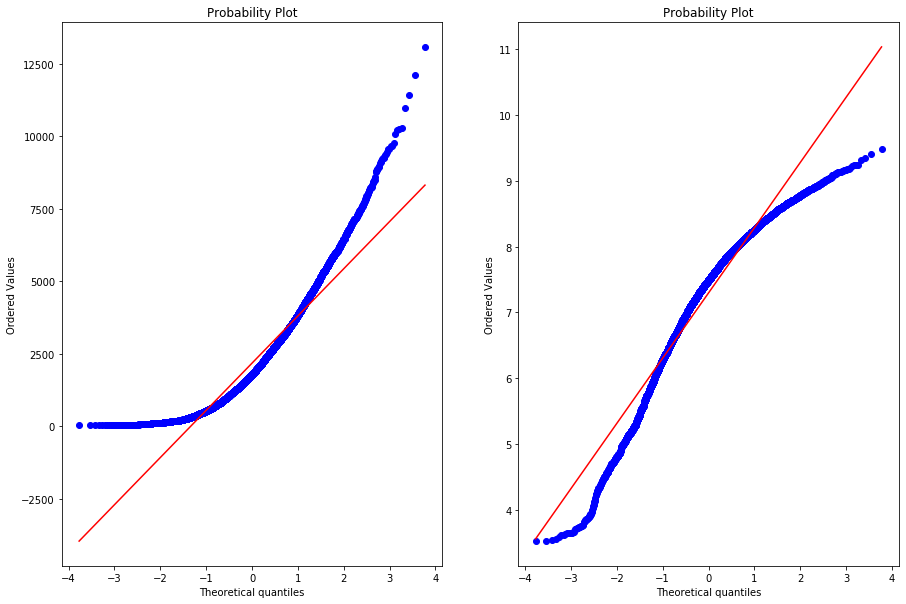

In [12]:
fig = plt.figure(figsize = (15, 10))
fig.add_subplot(1,2,1)
res = stats.probplot(train_data['Item_Outlet_Sales'], plot = plt);
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train_data['Item_Outlet_Sales']), plot = plt);

In [13]:
train_data['Item_Outlet_Sales'] = np.log1p(train_data['Item_Outlet_Sales'])

In [14]:
train_data['Item_Outlet_Sales'].head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

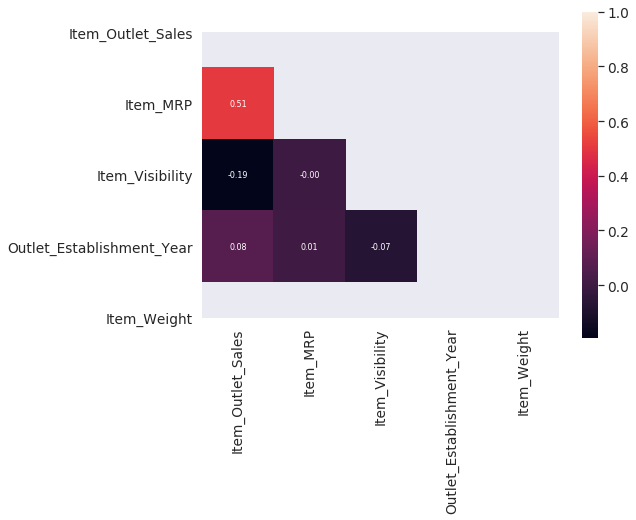

In [15]:
k = 11
corrmat = abs(train_data.corr(method='spearman'))
cols = corrmat.nlargest(k, 'Item_Outlet_Sales').index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale = 1.25)
f,ax = plt.subplots(figsize = (8,6))

mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
sns.set_style("white")
hm =sns.heatmap(cm, cbar = True, annot = True, square = True, 
                fmt = '.2f', annot_kws = {'size':8}, 
                yticklabels = cols.values, xticklabels = cols.values, mask = mask)
plt.show()

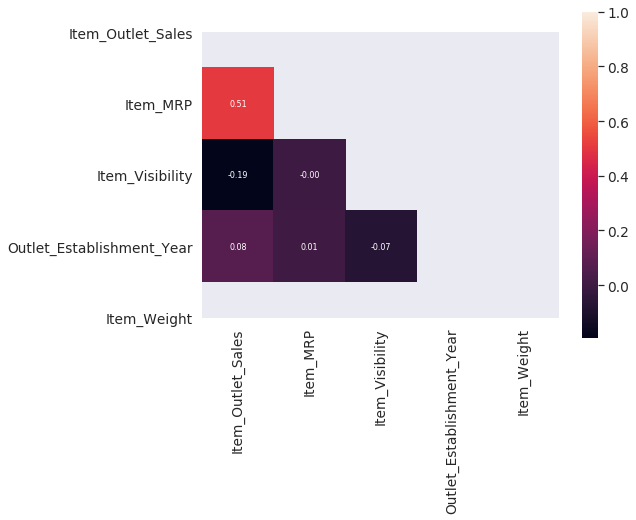

In [16]:
k = 15
corrmat = abs(train_data.corr(method='pearson'))
cols = corrmat.nlargest(k, 'Item_Outlet_Sales').index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale = 1.25)
f,ax = plt.subplots(figsize = (8,6))

mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
sns.set_style("white")
hm =sns.heatmap(cm, cbar = True, annot = True, square = True, 
                fmt = '.2f', annot_kws = {'size':8}, 
                yticklabels = cols.values, xticklabels = cols.values, mask = mask)
plt.show()

In [ ]:
data = pd.concat([train_data['Item_Outlet_Sales'], train_data['Item_MRP']], axis = 1)
f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data)
plt.show()

KeyboardInterrupt: 

In [ ]:
data = pd.concat([train_data['Item_Outlet_Sales'], train_data['Item_MRP']], axis = 1)
f,ax = plt.subplots(figsize = (8,6))
fig = sns.regplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = data)


In [ ]:
ds_cat = train_data.select_dtypes(include = "object").copy()